In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}


Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
from cdlib import algorithms

In [3]:
path = "../DataSet FFF/"
path_subgraph = "../DataSet FFF/Graph_data/"
path_graph = "../DataSet FFF/Graph_data/"
community_path = "../DataSet FFF/Community_task/"

In [4]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [5]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [6]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [7]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [8]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)

In [9]:
sub_graphs = []
for i in louvain_coms.communities:
    sub_graphs.append(G.subgraph(i))

In [10]:
def network_analysis(G):
    print(nx.info(G))
    N = G.number_of_nodes()
    print("LMAX: ", (N * (N-1))/2.0)
    print("AVG_Degree:", (2*G.number_of_edges())/N)
    density = nx.density(G)
    print("Density: ", density)
    print("Avg Clustering coefficient:", nx.average_clustering(G))

In [11]:
selected_graphs_idx = [0, 1, 2, 4, 6, 9]

In [12]:
for i in selected_graphs_idx:
    network_analysis(sub_graphs[i])

Name: 
Type: Graph
Number of nodes: 3798
Number of edges: 18220
Average degree:   9.5945
LMAX:  7210503.0
AVG_Degree: 9.594523433385993
Density:  0.002526869484694757
Avg Clustering coefficient: 0.7856192813971471
Name: 
Type: Graph
Number of nodes: 3029
Number of edges: 12984
Average degree:   8.5731
LMAX:  4585906.0
AVG_Degree: 8.573126444371079
Density:  0.0028312835021040554
Avg Clustering coefficient: 0.6994026619516511
Name: 
Type: Graph
Number of nodes: 895
Number of edges: 5389
Average degree:  12.0425
LMAX:  400065.0
AVG_Degree: 12.04245810055866
Density:  0.013470311074450401
Avg Clustering coefficient: 0.8646756087927123
Name: 
Type: Graph
Number of nodes: 490
Number of edges: 2889
Average degree:  11.7918
LMAX:  119805.0
AVG_Degree: 11.791836734693877
Density:  0.02411418555152122
Avg Clustering coefficient: 0.747297553344193
Name: 
Type: Graph
Number of nodes: 179
Number of edges: 631
Average degree:   7.0503
LMAX:  15931.0
AVG_Degree: 7.050279329608938
Density:  0.0396083

# 1 - Centrality Community 0

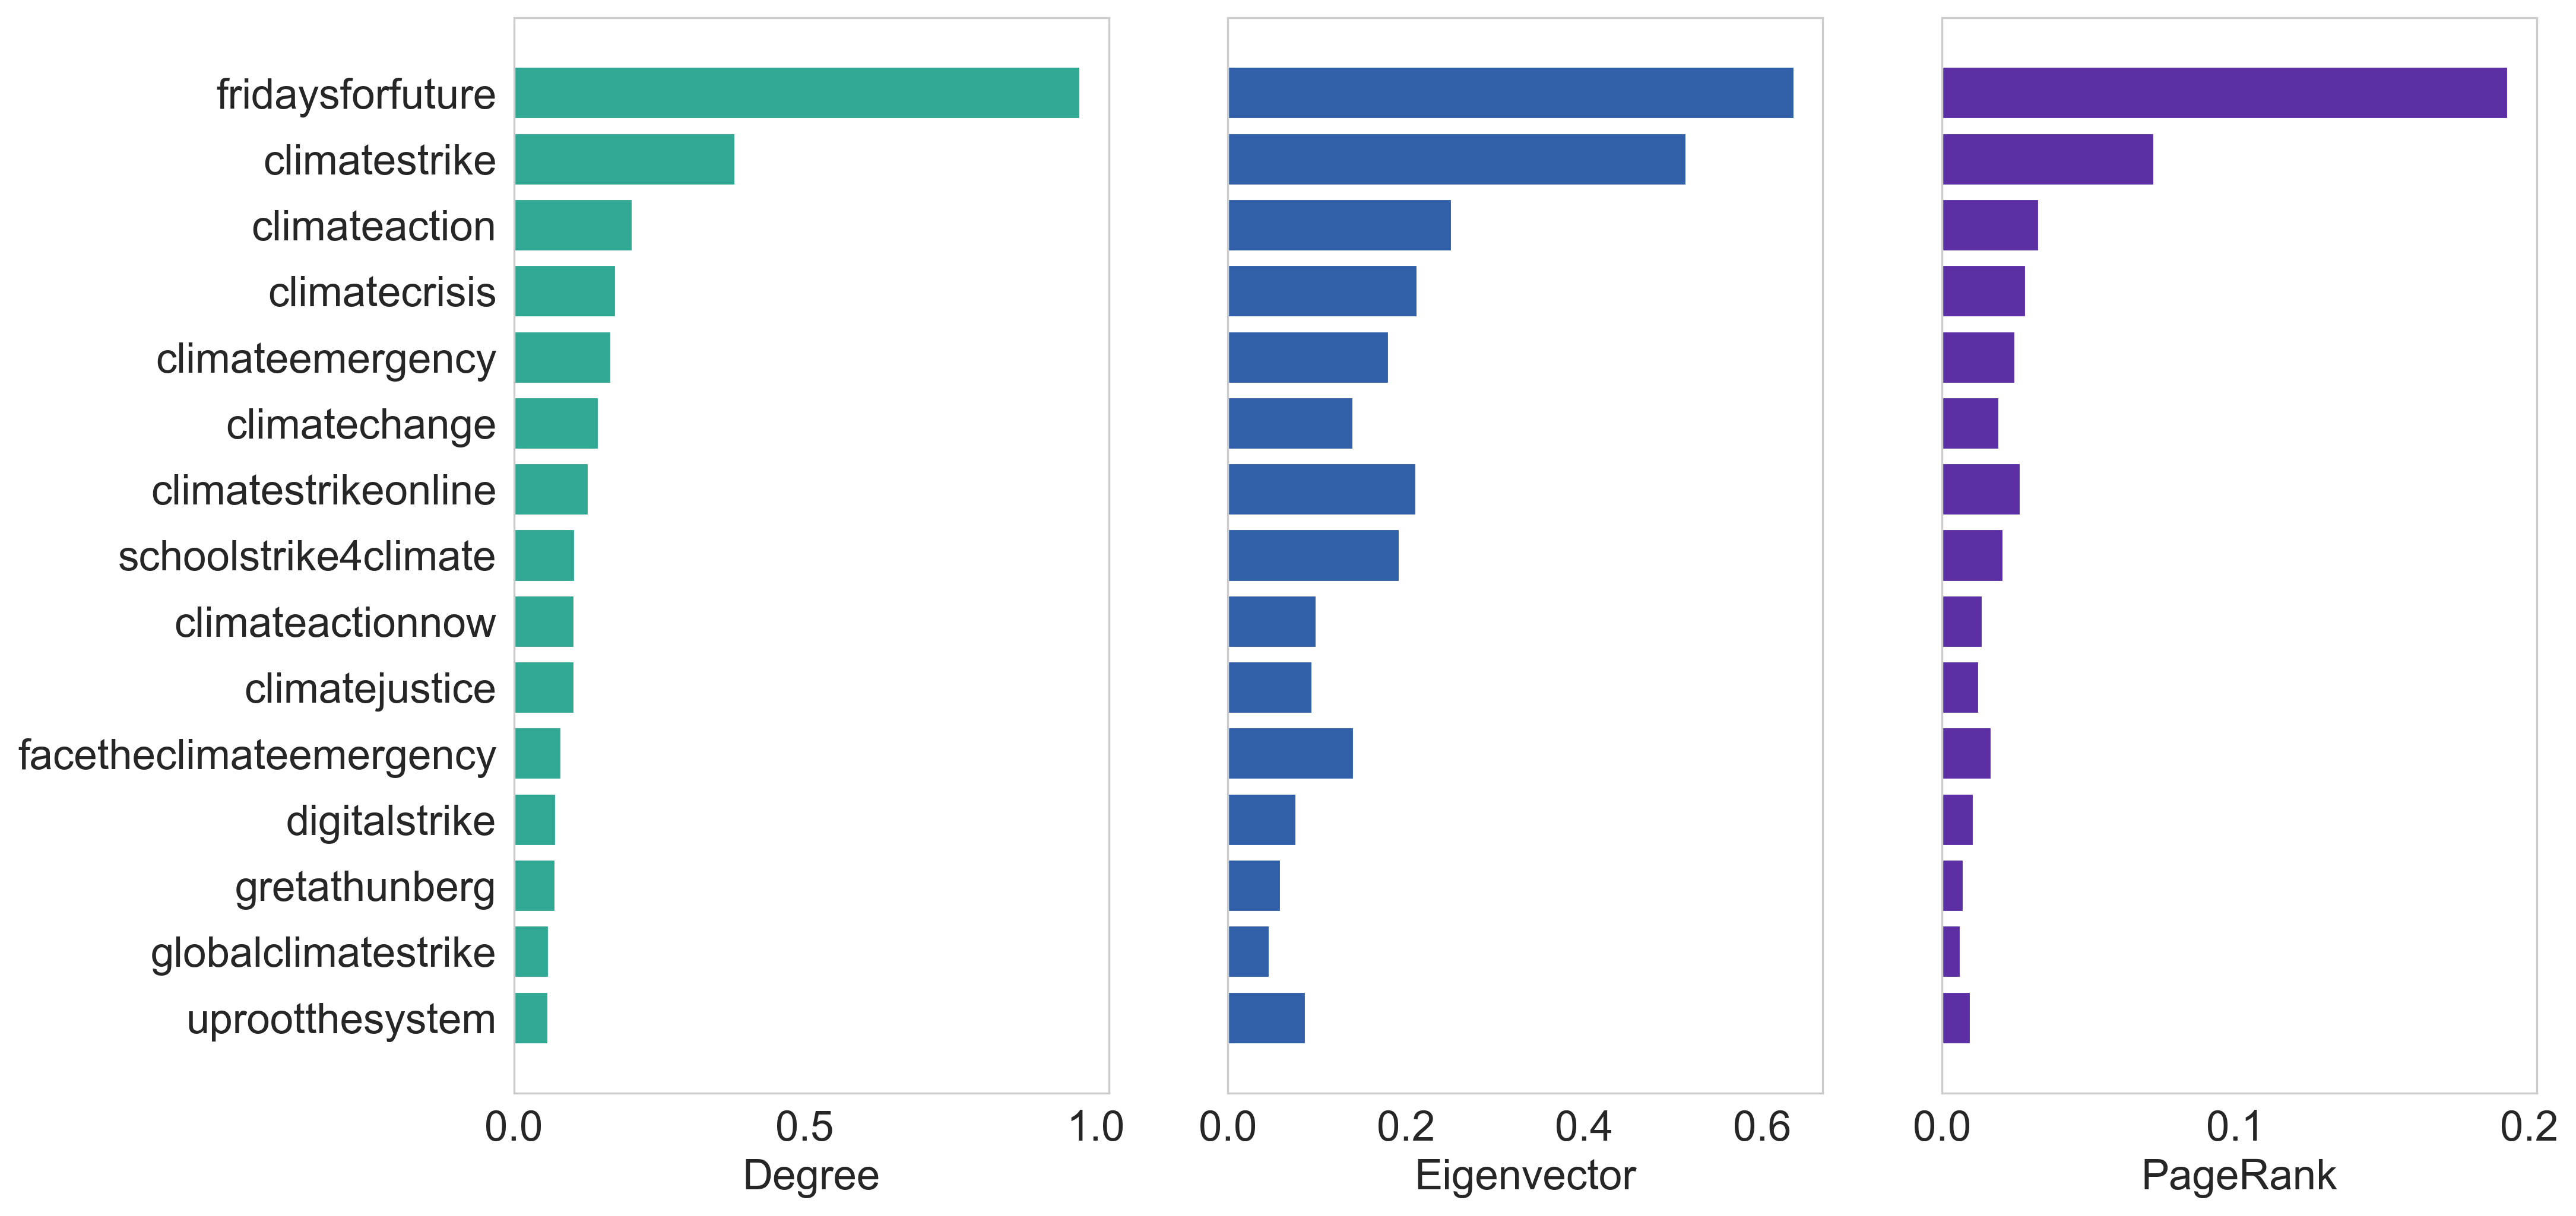

In [13]:
degree_centrality = nx.degree_centrality(sub_graphs[0])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[0], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[0], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[0])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[0])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[0], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 2 - Centrality Community 1

In [ ]:
degree_centrality = nx.degree_centrality(sub_graphs[1])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[1], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[1], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[1])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[1])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[1], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)


# 3 - Centrality Community 2

In [ ]:
degree_centrality = nx.degree_centrality(sub_graphs[2])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[2], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[2], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[2])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[2])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[2], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)


# 4 - Centrality Community 4

In [ ]:
degree_centrality = nx.degree_centrality(sub_graphs[4])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[4], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[4], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[4])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[4])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[4], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)


# 5 - Centrality Community 6

In [ ]:
degree_centrality = nx.degree_centrality(sub_graphs[6])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[6], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[6], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[6])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[6])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[6], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)


# 6 - Centrality Community 9

In [ ]:
degree_centrality = nx.degree_centrality(sub_graphs[9])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[9], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[9], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

In [ ]:
closeness_centrality = nx.closeness_centrality(sub_graphs[9])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[9])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[9], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)